# Data Analysis and Visualization of Credit Card Customers

This study will analyze Credit Card Customers data based on customer attributes and will include the following steps:

* Data Description
* Data Understanding
* Data Preparation
* Analysis and Visualization of the data 
* Conclusions

##### CLIENTNUM:  

    Unique customer identifier.

##### Attrition_Flag : 
    
    Indicates whether the customer's account is active or closed.
 
##### Demographic Attributes: 

    Customer_Age: Age of the customer.
    Gender: Gender of the customer.
    Dependent_count: Number of dependents the customer has.
    Education_Level: Education level of the customer.
    Marital_Status: Marital status of the customer.

##### Financial Attributes:

    Income_Category: Income category of the customer.
     
##### Bank Customer-Specific Information:

    Card_Category: Category of the credit card held by the customer.
    Months_on_book: Number of months the customer has been a banking customer.
    Total_Relationship_Count: Total number of bank products the customer has.
    Months_Inactive_12_mon: Number of inactive months in the last 12 months.
    Contacts_Count_12_mon: Number of contacts with the bank in the last 12 months.
    Credit_Limit: Credit limit on the credit card.
    Total_Revolving_Bal: Total revolving balance on the credit card.
    Avg_Open_To_Buy: Average open-to-buy credit limit on the credit card.
    Total_Amt_Chng_Q4_Q1: Change in transaction amount over the last four quarters.
    Total_Trans_Amt: Total transaction amount in the last 12 months.
    Total_Trans_Ct: Total number of transactions in the last 12 months.
    Total_Ct_Chng_Q4_Q1: Change in the number of transactions over the last four quarters.
    Avg_Utilization_Ratio: Average utilization ratio of the credit card.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)


In [2]:
df = pd.read_excel('/kaggle/input/creditcard-customer-data-xlsx/CreditCard_Customer_data.xlsx')

# Data Description

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1335.000,1144,42,1625.000,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1541.000,1291,33,3714.000,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2594.000,1887,20,2333.000,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1405.000,1171,20,2333.000,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2175.000,816,28,45048.000,0.000


# Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
# Before beginning the analysis, it would be helpful to check all the unique values in each column. This will facilitate the visualization of data more easily.

df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1153
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           825
Avg_Utilization_Ratio         964
dtype: int64

In [6]:
#Statistical values of numerical columns can be examined here. This approach helps identify outliers based on statistical metrics.

df.describe([0.90,0.95,0.99]).T     

,count,mean,std,min,50%,90%,95%,99%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,717926358.000,798512118.000,814212033.000,825250761.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,46.000,57.000,60.000,65.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,2.000,4.000,4.000,5.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,36.000,46.000,50.000,56.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,4.000,6.000,6.000,6.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,3.000,4.000,6.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,4.000,4.000,5.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,4549.000,23400.200,34516.000,34516.000,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,1276.000,2228.400,2517.000,2517.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,3474.000,21964.600,32183.400,34294.140,34516.000


In [7]:
# Correlation between the numerical columns 

df.select_dtypes(include=[np.number]).corr().T

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000,0.008,0.007,0.135,0.007,0.006,0.006,0.006,0.001,0.006,-0.004,-0.020,-0.003,0.010,0.000
Customer_Age,0.008,1.000,-0.122,0.789,-0.011,0.054,-0.018,0.002,0.015,0.001,-0.030,-0.046,-0.067,-0.002,0.007
Dependent_count,0.007,-0.122,1.000,-0.103,-0.039,-0.011,-0.041,0.068,-0.003,0.068,-0.007,0.025,0.050,-0.002,-0.037
Months_on_book,0.135,0.789,-0.103,1.000,-0.009,0.074,-0.011,0.008,0.009,0.007,-0.008,-0.039,-0.050,0.002,-0.008
Total_Relationship_Count,0.007,-0.011,-0.039,-0.009,1.000,-0.004,0.055,-0.071,0.014,-0.073,0.021,-0.347,-0.242,0.028,0.068
Months_Inactive_12_mon,0.006,0.054,-0.011,0.074,-0.004,1.000,0.029,-0.020,-0.042,-0.017,-0.002,-0.037,-0.043,-0.012,-0.008
Contacts_Count_12_mon,0.006,-0.018,-0.041,-0.011,0.055,0.029,1.000,0.021,-0.054,0.026,-0.010,-0.113,-0.152,0.007,-0.055
Credit_Limit,0.006,0.002,0.068,0.008,-0.071,-0.020,0.021,1.000,0.042,0.996,0.013,0.172,0.076,0.015,-0.483
Total_Revolving_Bal,0.001,0.015,-0.003,0.009,0.014,-0.042,-0.054,0.042,1.000,-0.047,0.000,0.064,0.056,0.013,0.624
Avg_Open_To_Buy,0.006,0.001,0.068,0.007,-0.073,-0.017,0.026,0.996,-0.047,1.000,0.013,0.166,0.071,0.014,-0.539


In [8]:
# Descriptive analysis for categorical data

df.describe(include='O').T     

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [9]:
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

# Data Preparation

In [10]:
# Check for the null-values

df.isnull().sum()

#  There are no null values. 

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

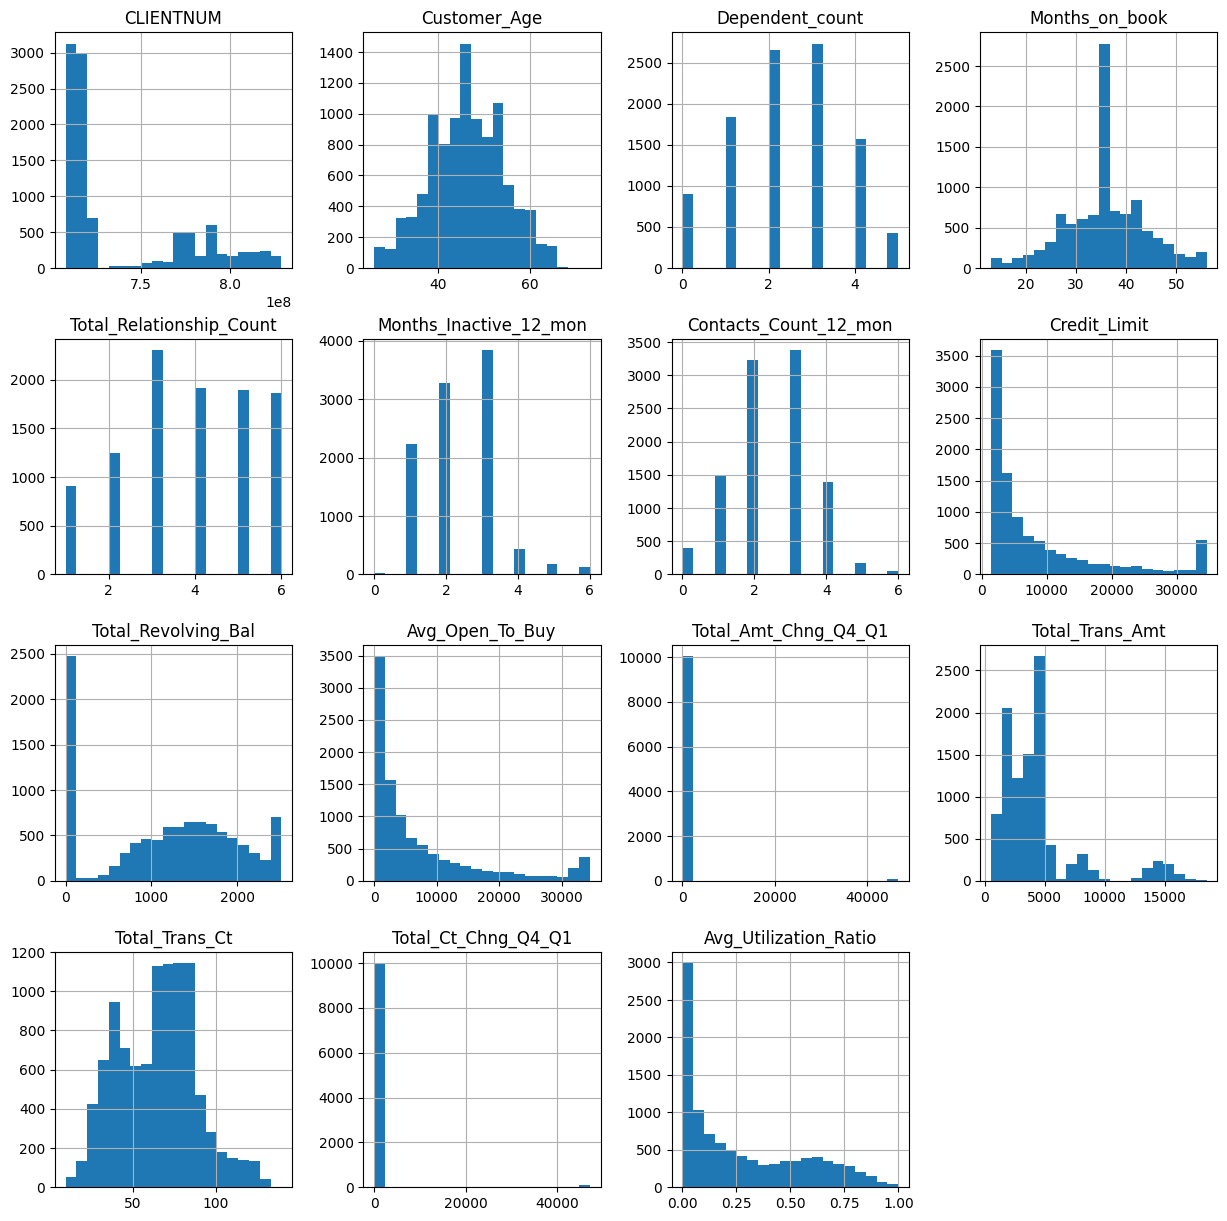

In [11]:
# General distrubition of the numerical variables

axList = df.hist(bins=20, figsize = (15, 15))
plt.savefig("Hist.png")

# Analysis and Visualization of the Data

#### Distribution of Credit Card Holders by Age

array([[<Axes: title={'center': 'Customer_Age'}>]], dtype=object)

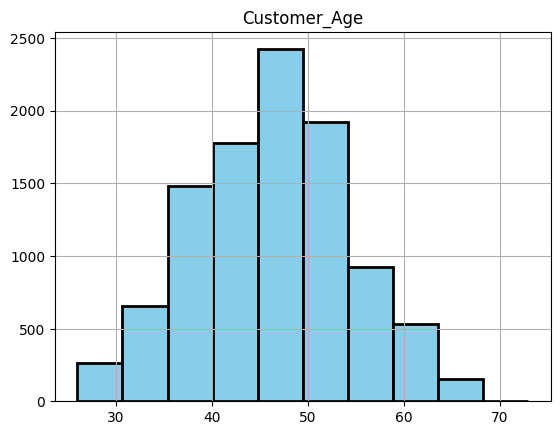

In [12]:
df.hist('Customer_Age',color = "skyblue", ec="black", lw=2)

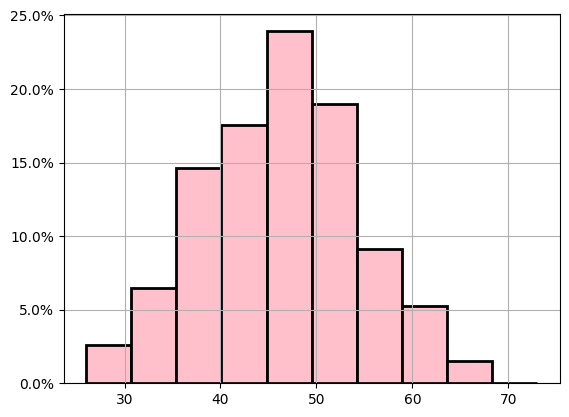

In [13]:
#apply percentage format to y-axis

from matplotlib.ticker import PercentFormatter

#create histogram, using percentages instead of counts

plt.hist(df['Customer_Age'], weights=np.ones(len(df)) / len(df), color = 'pink', edgecolor="black", lw=2)
plt.grid(True) ##Grid plotting

#apply percentage format to y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


#### Distribution of Credit Card Holders by Marital Status and Gender

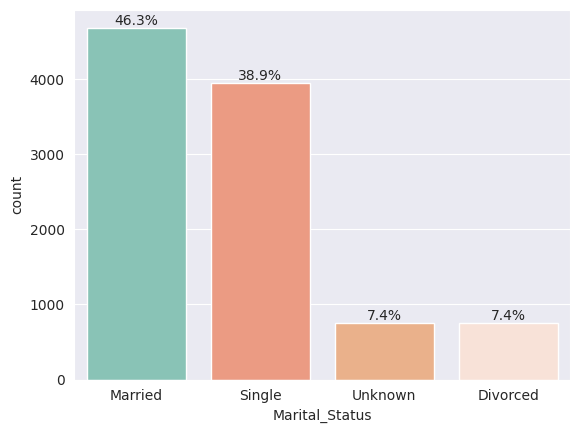

In [14]:
sns.set_style("darkgrid")
ax = sns.countplot(x = df['Marital_Status'], palette=["#7fcdbb","#fc9272","#FAAE7B","#fee0d2"])
# get the total count of the type column
total = df['Marital_Status'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

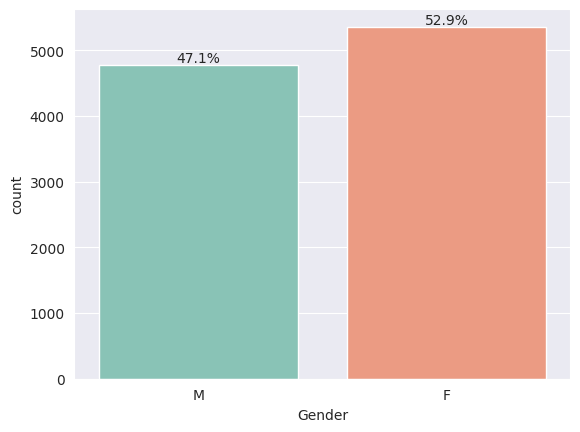

In [15]:
sns.set_style("darkgrid")
ax = sns.countplot(x = df['Gender'], palette=["#7fcdbb","#fc9272","#FAAE7B","#fee0d2"])
# get the total count of the type column
total = df['Gender'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

#### Distribution of Credit Card Holders by Income Category

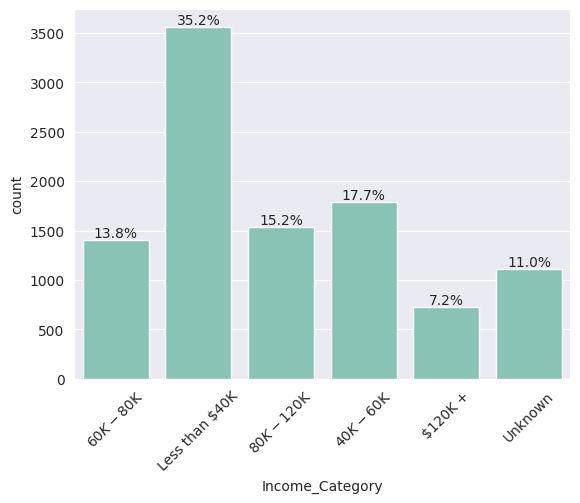

In [16]:
sns.set_style("darkgrid")
ax = sns.countplot(x = df['Income_Category'], palette=["#7fcdbb"])
# get the total count of the type column
total = df['Income_Category'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.xticks(rotation=45)
plt.show()

#### Income Category vs Gender

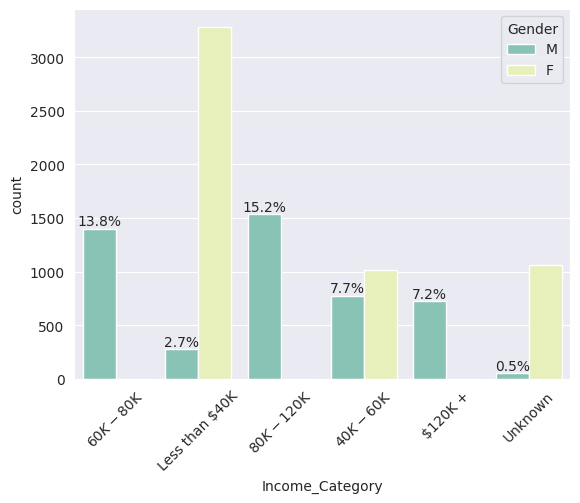

In [17]:
sns.set_style("darkgrid")
ax = sns.countplot(x=df['Income_Category'], hue=df['Gender'], palette=["#7fcdbb", "#edf8b1"])
total = df['Income_Category'].count()

ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.xticks(rotation=45)
plt.show()

#### Distribution of Credit Card Holders by Education Level

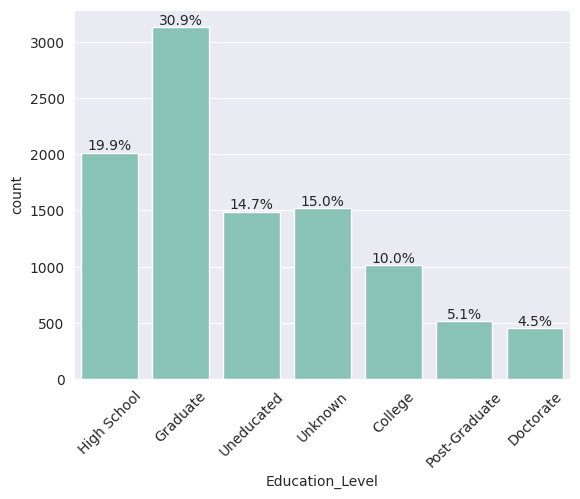

In [18]:
sns.set_style("darkgrid")
ax = sns.countplot(x = df['Education_Level'], palette=["#7fcdbb"])

# get the total count of the type column
total = df['Education_Level'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.xticks(rotation=45)
plt.show()

#### Distribution of Credit Card Holders by Card Category

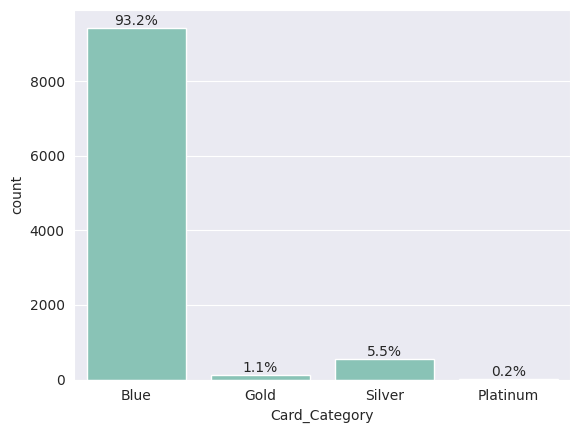

In [19]:
sns.set_style("darkgrid")
ax = sns.countplot(x = df['Card_Category'], palette=["#7fcdbb"])

# get the total count of the type column
total = df['Card_Category'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

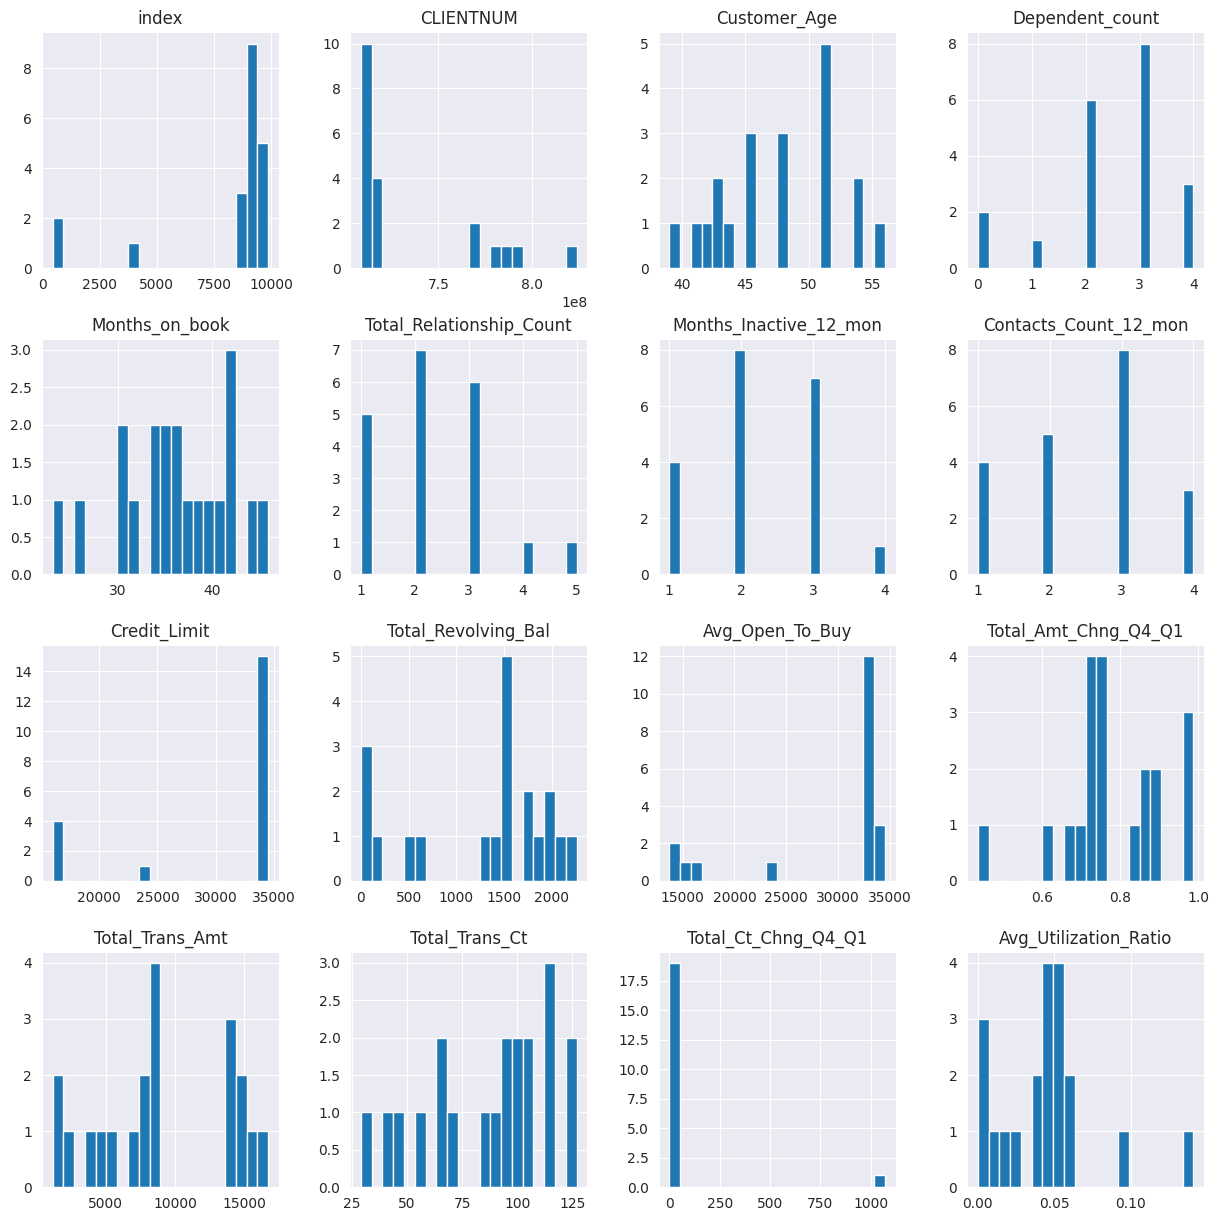

In [20]:
# Let's conduct a detailed analysis specifically for Platinum card users since the Platinum card users represent the smallest segment in this dataset.

df_plat=df.query("Card_Category == 'Platinum'")

df_plat.reset_index(inplace=True)

axList = df_plat.hist(bins=20, figsize = (15, 15))
plt.savefig("Hist.png")

#### Education Level Outliers - Box Plot

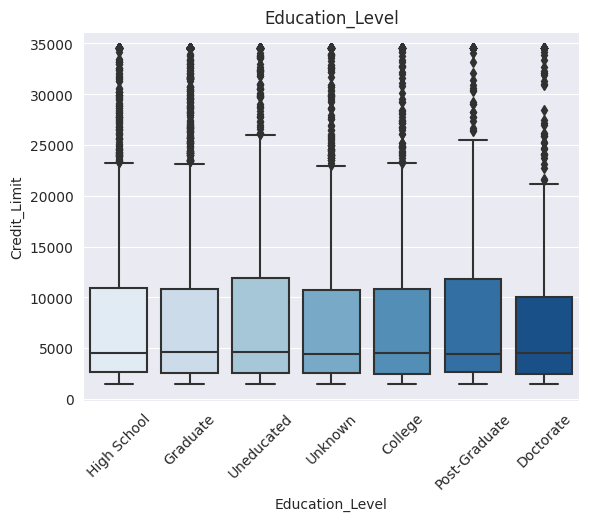

In [21]:
plt.title('Education_Level')
sns.boxplot(x=df['Education_Level'], y=df.Credit_Limit, palette=('Blues'))
plt.xticks(rotation=45)
plt.show()

#### Card Category Outliers - Box Plot

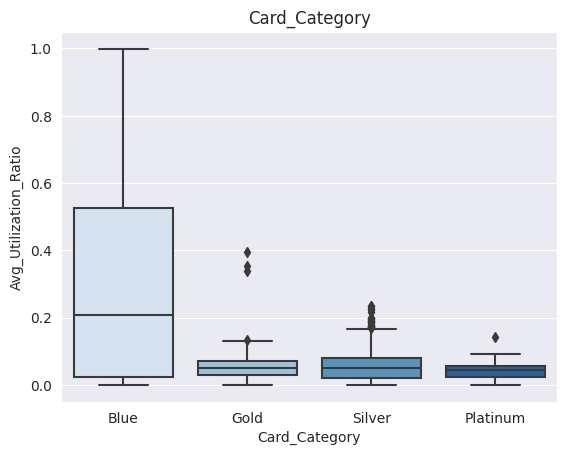

In [22]:
plt.title('Card_Category')
sns.boxplot(x=df['Card_Category'], y=df['Avg_Utilization_Ratio'], palette=('Blues'))
plt.show()

### Credit Limit - Avg Utilization Correlation 

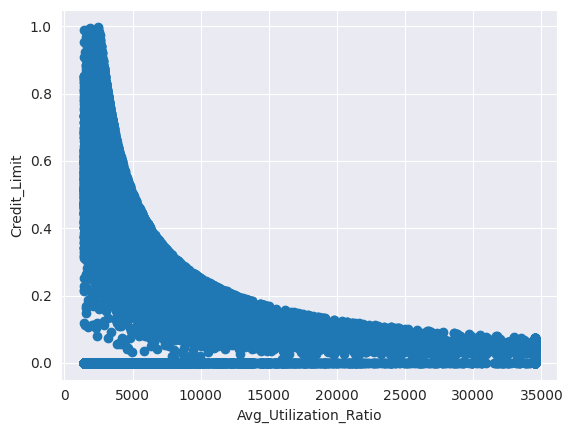

In [23]:
plt.scatter(df['Credit_Limit'], df['Avg_Utilization_Ratio'])
plt.xlabel("Avg_Utilization_Ratio")
plt.ylabel("Credit_Limit")
plt.show()

<Axes: title={'center': 'Attrition_Flag vs Credit_Limit'}, xlabel='Attrition_Flag', ylabel='Credit_Limit'>

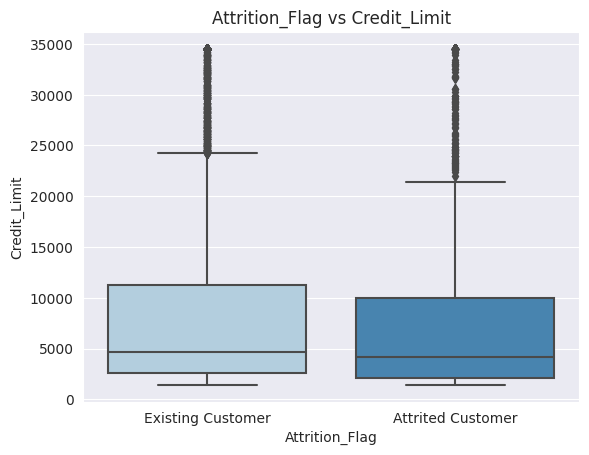

In [24]:
plt.title('Attrition_Flag vs Credit_Limit')
sns.boxplot(x=df['Attrition_Flag'], y=df["Credit_Limit"], palette=('Blues'))

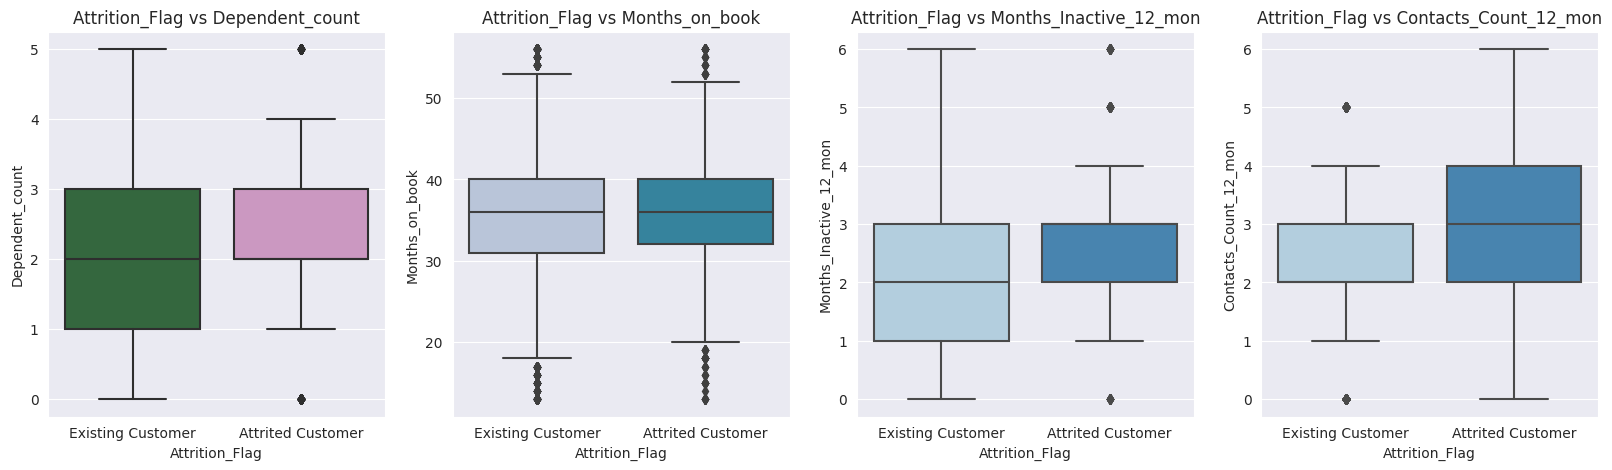

In [25]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.title('Attrition_Flag vs Dependent_count')
sns.boxplot(x=df.Attrition_Flag, y=df.Dependent_count, palette=("cubehelix"))

plt.subplot(1,4,2)
plt.title('Attrition_Flag vs Months_on_book')
sns.boxplot(x=df.Attrition_Flag, y=df.Months_on_book, palette=("PuBuGn"))

plt.subplot(1,4,3)
plt.title('Attrition_Flag vs Months_Inactive_12_mon')
sns.boxplot(x=df.Attrition_Flag, y=df.Months_Inactive_12_mon, palette=("Blues"))


plt.subplot(1,4,4)
plt.title('Attrition_Flag vs Contacts_Count_12_mon')
sns.boxplot(x=df.Attrition_Flag, y=df.Contacts_Count_12_mon, palette=("Blues"))

plt.show()

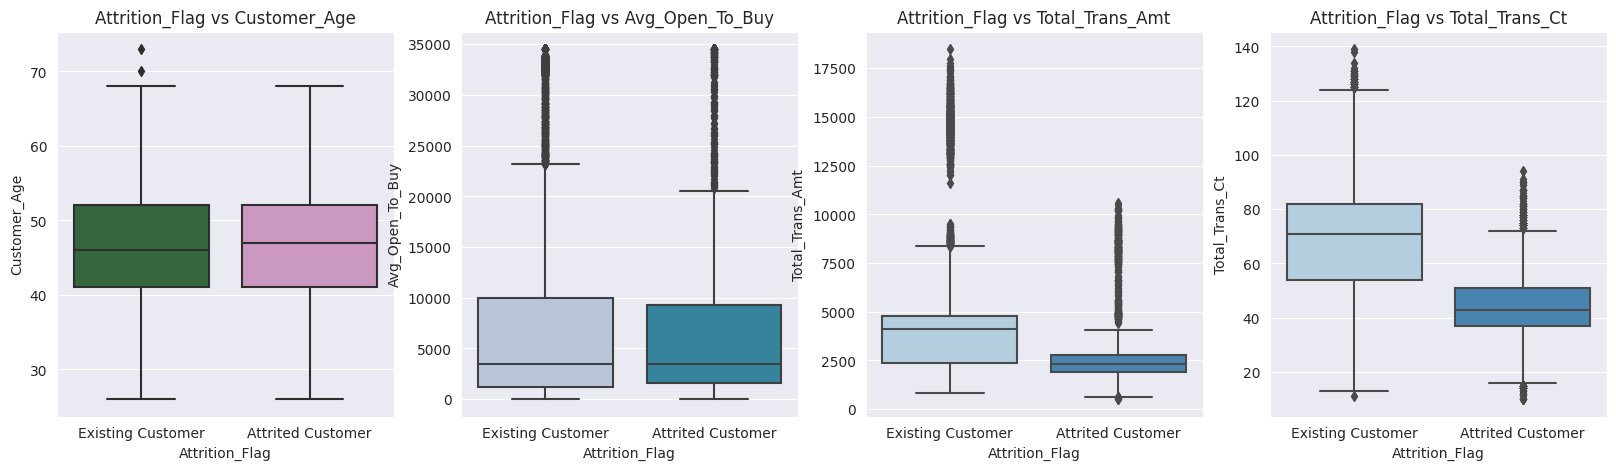

In [26]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.title('Attrition_Flag vs Customer_Age')
sns.boxplot(x=df.Attrition_Flag, y=df.Customer_Age, palette=("cubehelix"))

plt.subplot(1,4,2)
plt.title('Attrition_Flag vs Avg_Open_To_Buy')
sns.boxplot(x=df.Attrition_Flag, y=df.Avg_Open_To_Buy, palette=("PuBuGn"))

plt.subplot(1,4,3)
plt.title('Attrition_Flag vs Total_Trans_Amt')
sns.boxplot(x=df.Attrition_Flag, y=df.Total_Trans_Amt, palette=("Blues"))


plt.subplot(1,4,4)
plt.title('Attrition_Flag vs Total_Trans_Ct')
sns.boxplot(x=df.Attrition_Flag, y=df.Total_Trans_Ct, palette=("Blues"))

plt.show()

# Conclusions


In this analysis, the Card Customer Dataset provides insights into the general behavior and categorization of customers.The analysis reveals the following:

* The gender distribution among customers is almost equal.
* The majority of customers fall within the age range of 40-55, with an average age of 46. Middle-aged individuals constitute the largest customer segment for the bank. As a result, the bank has launched special campaigns tailored to this demographic.
* The majority of customers use the Blue card, indicating a preference for basic card options. The bank could explore strategies to increase the usage of other card categories based on customer income levels.
* Most customers have a "Graduate" education level, suggesting a basic understanding of economics among the customer base.
* Male customers tend to have higher credit limits compared to female customers, indicating a higher usage of credit cards among males. Further investigation is needed to understand the reasons behind this disparity.
* The highest income category is predominantly represented by male customers, indicating a potential gap in financial literacy between genders. The bank could consider offering quick training sessions on investing to attract more female customers to this segment.
* Platinum card usage is primarily among middle-aged individuals. Implementing minor changes may help attract customers from other age groups to the bank.

These insights provide valuable information for the bank to tailor its services and offerings to better meet the needs of its diverse customer base.